<h2><i>Titanic Predictions</i></h2>

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset
df = pd.read_csv('../Machine Learning Playground/titanic/train.csv')

In [3]:
#pull last 10 records--> Shows that the df has 12 columns with numerical indexes
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [4]:
#Check Central Tendency
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Make assumptions on unique Values
total_len =len(df)
unique_fare= len(df['Fare'].unique())
unique_cabin=len(df['Cabin'].unique())
unique_ticket=len(df['Ticket'].unique())
print("total trained counts are {0} \n Unique fare counts are {1}\n Unique cabin counts are {2} \n unique ticket count is {3}".format(total_len,unique_fare,unique_fare,unique_ticket))

total trained counts are 891 
 Unique fare counts are 248
 Unique cabin counts are 248 
 unique ticket count is 681


<h2><i> Finding Co-relations using different plots</i> </h2>

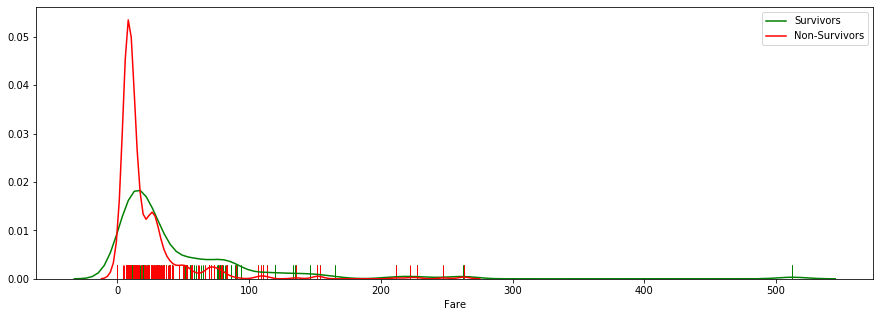

In [6]:
#Check the distributions for Fare vs Survival Rate
Survivors = df[df['Survived']==1].drop(['Name','PassengerId'],axis=1)
Non_Survivors = df[df['Survived']==0].drop(['Name','PassengerId'],axis=1)
plt.figure(figsize=(15,5))
sns.distplot(Survivors['Fare'],kde=True,rug=True,hist=False,color="green",label="Survivors")
sns.distplot(Non_Survivors['Fare'],kde=True,rug=True,hist=False,color="red",label="Non-Survivors")
plt.show()
plt.close()

In [7]:
len(Survivors)

342

In [8]:
#Total Null values in the dataset
Survivors.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age          52
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       206
Embarked      2
dtype: int64

In [9]:
Survivors.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
8,1,3,female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,female,14.0,1,0,237736,30.0708,NaN,C
10,1,3,female,4.0,1,1,PP 9549,16.7000,G6,S
11,1,1,female,58.0,0,0,113783,26.5500,C103,S
15,1,2,female,55.0,0,0,248706,16.0000,NaN,S
17,1,2,male,NaN,0,0,244373,13.0000,NaN,S
19,1,3,female,NaN,0,0,2649,7.2250,NaN,C


In [10]:
Male_Survivors = len(Survivors[Survivors['Sex']=="male"]);Female_Survivors = len(Survivors[Survivors['Sex']=="female"])

In [11]:
#Indicates Female survivors are more
Female_to_Male_Survivors = round(Female_Survivors/Male_Survivors,3)

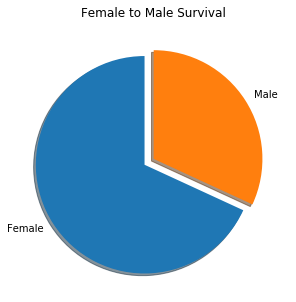

Ratio is 2.138


In [12]:
#plot the survival ratio for Women vs Men
data = [Female_Survivors,Male_Survivors]
explode=[0.1,0]
labels = ["Female","Male"]
plt.figure(figsize=[5,5])
plt.pie(data,explode,labels,shadow=True,autopct="",startangle=90)
plt.title('Female to Male Survival')
plt.show()
print("Ratio is {0}".format(Female_to_Male_Survivors))

In [13]:
#Embarked_Place = {"S":0,"C":1,"Q":"2"}            
#df['Embarked_Enocded'] = df['Embarked'].map(Embarked_Place)

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


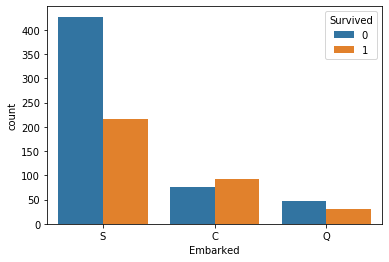

In [15]:
# Embarked Place vs Survivors
sns.countplot(x="Embarked",hue="Survived",data=df)

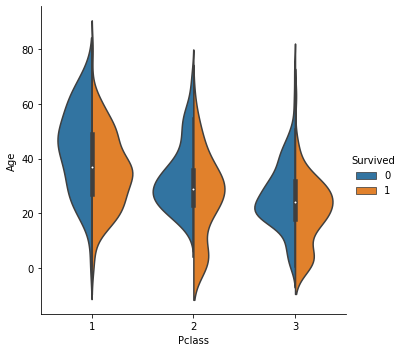

In [16]:
# PClass vs Survivors
sns.catplot(x="Pclass",y="Age",hue="Survived",kind="violin",split=True,data=df)

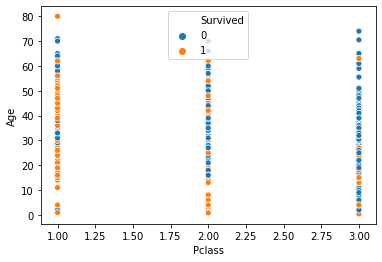

In [17]:
sns.scatterplot(x="Pclass",y="Age",hue="Survived",data=df)

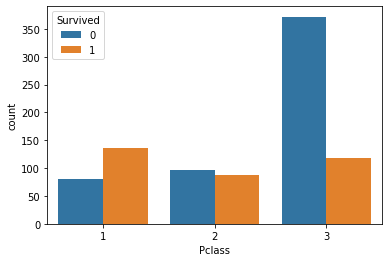

In [18]:
sns.countplot(x="Pclass",hue="Survived",data=df)

<h2><i>Data Replication & continued EDA</i></h2>

In [19]:
df_replica = df.copy(deep=True)

In [20]:
df_replica[['Ticket_Details_One','Ticket_Details_Two']] = df.Ticket.str.split(" ",n=1, expand=True) 

In [21]:
df_replica['Title'] = df['Name'].str.extract(r'(\w*Mr.|Mrs.|Master.|Miss.|Rev.\s)') 

In [22]:
#Finding the average values for age in every category for titles
avg_of_Mr = np.mean(df_replica[(df_replica['Title']=="Mr.")]['Age'])
avg_of_Mrs = np.mean(df_replica[(df_replica['Title']=="Mrs")]['Age'])
avg_of_Master = np.mean(df_replica[(df_replica['Title']=="Master.")]['Age'])
avg_of_Miss = np.mean(df_replica[(df_replica['Title']=="Miss.")]['Age'])
avg_of_Rev = np.mean(df_replica[(df_replica['Title']=="Rev.")]['Age'])

In [23]:
#Replacing the empty ages for every title with the respective means
def Replace_Ages_With_Mean_Age():
    df_replica.loc[(df_replica.Age.astype(str)=='nan') & (df_replica.Title == "Mr.")] = avg_of_Mr
    df_replica.loc[(df_replica.Age.astype(str)=='nan') & (df_replica.Title == "Mrs")] = avg_of_Mrs
    df_replica.loc[(df_replica.Age.astype(str)=='nan') & (df_replica.Title == "Master.")] = avg_of_Master
    df_replica.loc[(df_replica.Age.astype(str)=='nan') & (df_replica.Title == "Miss.")] = avg_of_Miss
    df_replica.loc[(df_replica.Age.astype(str)=='nan') & (df_replica.Title == "Rev.")] = avg_of_Rev
    

In [24]:
Replace_Ages_With_Mean_Age()

In [ ]:
df_replica = df_replica.drop(['Name'],axis=1)

<h2>Data Pre-processing</h2>

## 

<h2>Co-relation Matrix</h2>

In [ ]:
df_replica.corr()